<a href="https://colab.research.google.com/github/AtharvPandit07/Deep-Learning/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression with Keras

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [6]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


###Step 2: Perform Basic Data Quality Checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
df.duplicated().sum()

41

In [10]:
df = df.drop_duplicates(keep="first")
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


##Seperate X & Y(PE)

In [11]:
X=df.drop(columns=["PE"])
Y=df[['PE']]

In [12]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


Preprocess X using Pipeline

In [15]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [19]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform="pandas")

In [21]:
X_pre =num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


##Apply train test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [29]:
Y_train.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [30]:
X_test.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [31]:
Y_test.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [32]:
X_train.shape

(7621, 4)

In [33]:
X_test.shape

(1906, 4)

In [36]:
X_train.shape[1]

4

##Build Neural Network

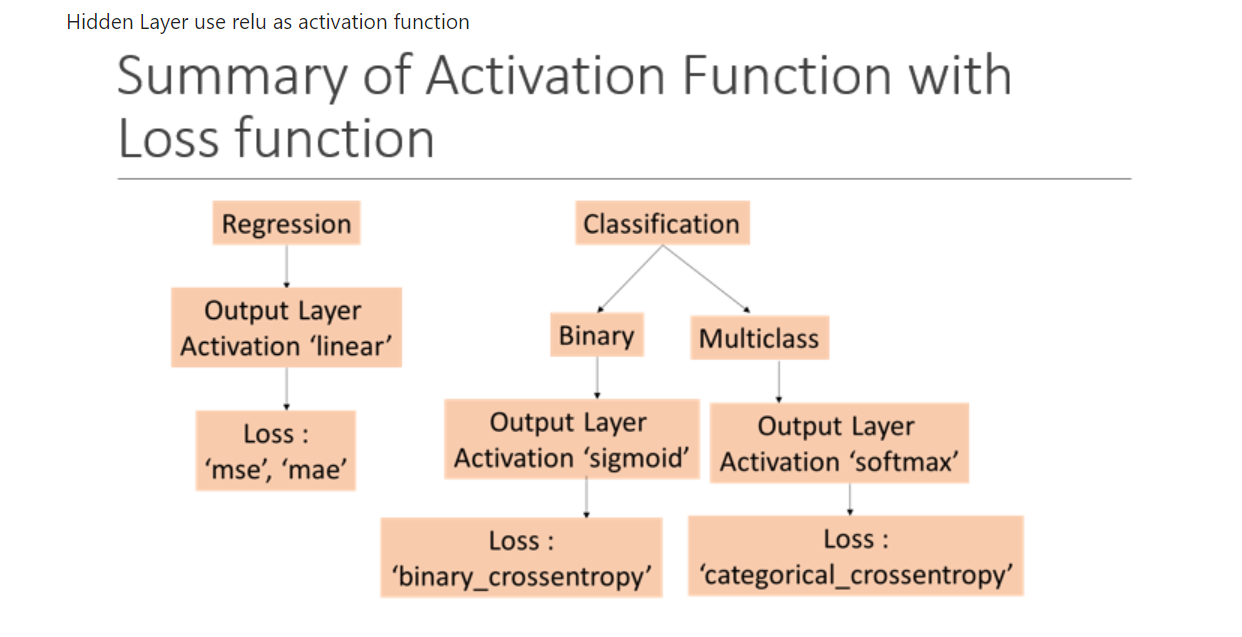

In [39]:
from keras.models import Sequential
from keras.layers import  Dense ,Input

In [45]:
#Initialize the model
model= Sequential()
# Add input Layer
model.add(Input(shape=(X_train.shape[1],)))
#Add Dense Hidden Layer 1
model.add(Dense(16,activation="relu"))
#Add Dense Hidden Layer 2
model.add(Dense(8,activation="relu"))
# Add output layer
model.add(Dense(1,activation="linear"))

In [46]:
#Compile the model
model.compile(loss="mse",metrics=["mae"],optimizer="adam")

In [48]:
hist=model.fit(X_train,Y_train,
               validation_data=(X_test,Y_test),epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 5ms/step - loss: 204425.4531 - mae: 451.8359 - val_loss: 197860.7812 - val_mae: 444.6093
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 175911.4688 - mae: 418.5918 - val_loss: 144541.7812 - val_mae: 378.3568
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 108006.3594 - mae: 316.4327 - val_loss: 75572.5469 - val_mae: 250.4916
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 55285.2383 - mae: 209.0771 - val_loss: 37996.6797 - val_mae: 172.2589
Epoch 5/60
239/239 [==============================] - 1s 5ms/step - loss: 25510.5898 - mae: 137.4530 - val_loss: 15858.2754 - val_mae: 106.9913
Epoch 6/60
239/239 [==============================] - 1s 6ms/step - loss: 11831.8096 - mae: 91.7707 - val_loss: 8794.2012 - val_mae: 78.5706
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 7544.2017 - mae: 72.5485 - val_loss: 5966.2319 - val_mae: 63

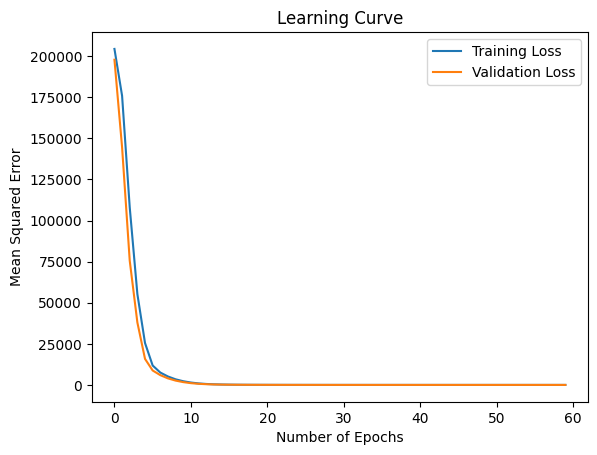

In [49]:

import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [50]:
model.evaluate(X_train,Y_train)

239/239 [==============================] - 1s 4ms/step - loss: 18.0509 - mae: 3.3419


[18.0508975982666, 3.3419275283813477]

In [51]:
model.evaluate(X_test,Y_test)

60/60 [==============================] - 0s 5ms/step - loss: 17.9295 - mae: 3.3747


[17.929489135742188, 3.374668598175049]

##Predict result

In [52]:

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

60/60 [==============================] - 0s 2ms/step


In [53]:
ypred_train[0:5]

array([[450.61398],
       [479.5214 ],
       [468.70383],
       [432.92252],
       [466.47488]], dtype=float32)

In [54]:
Y_train.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [55]:
from sklearn.metrics import r2_score
r2_score(Y_test,ypred_test)

0.9405894699805065

Because  r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [56]:

url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [57]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [58]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [59]:
preds=model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 4ms/step


array([[445.0245 ],
       [440.2688 ],
       [432.9637 ],
       [440.33588],
       [471.75272]], dtype=float32)

In [60]:
xnew["PowerOutput_pred"]=preds

In [61]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.024506
1,28.88,54.89,1007.16,46.60,440.268799
2,27.89,73.21,1001.32,85.88,432.963715
3,25.69,62.26,1011.38,74.08,440.335876
4,12.16,40.81,1025.79,70.97,471.752716
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.718109
96,11.78,39.96,1011.37,82.95,472.938934
97,5.62,41.38,1020.91,86.21,485.145294
98,24.96,74.99,1008.25,80.52,435.828186


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

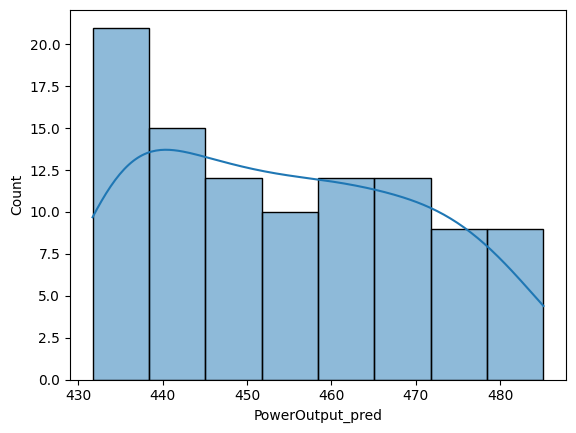

In [62]:
import seaborn as sns
sns.histplot(data=xnew,x="PowerOutput_pred",kde= True)

In [63]:

xnew.to_csv("Results_Poweroutput.csv", index=False)